In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from functools import partial
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Plot training and validation metrics
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_7 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                      

2023-10-21 18:10:39.388522: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


225/225 [==============================] - 12s 49ms/step - loss: 1.8725 - categorical_accuracy: 0.2967 - val_loss: 1.8371 - val_categorical_accuracy: 0.2680
Epoch 2/50
225/225 [==============================] - 10s 46ms/step - loss: 1.5610 - categorical_accuracy: 0.4037 - val_loss: 1.5673 - val_categorical_accuracy: 0.3990
Epoch 3/50
225/225 [==============================] - 11s 50ms/step - loss: 1.4176 - categorical_accuracy: 0.4611 - val_loss: 1.3421 - val_categorical_accuracy: 0.4893
Epoch 4/50
225/225 [==============================] - 11s 47ms/step - loss: 1.3208 - categorical_accuracy: 0.4982 - val_loss: 1.3174 - val_categorical_accuracy: 0.4937
Epoch 5/50
225/225 [==============================] - 10s 45ms/step - loss: 1.2523 - categorical_accuracy: 0.5265 - val_loss: 1.2421 - val_categorical_accuracy: 0.5272
Epoch 6/50
225/225 [==============================] - 10s 46ms/step - loss: 1.2075 - categorical_accuracy: 0.5447 - val_loss: 1.1910 - val_categorical_accuracy: 0.5520
Epo

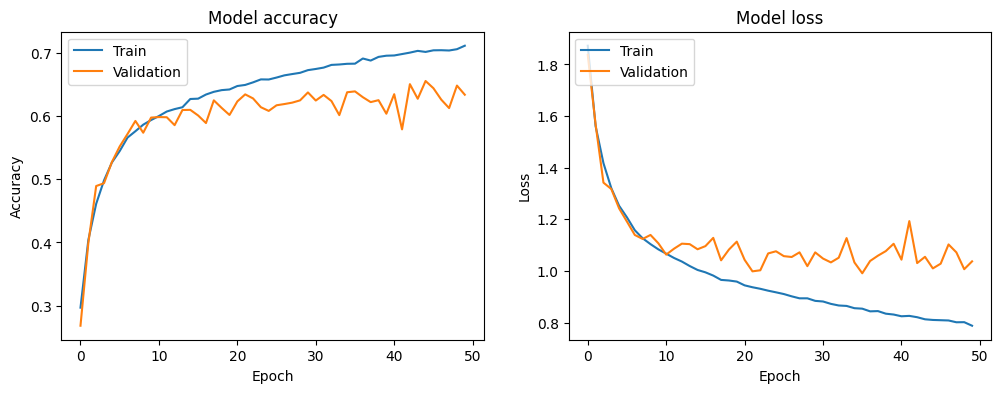

29/29 [==============================] - 0s 15ms/step - loss: 0.9844 - categorical_accuracy: 0.6506
Test Accuracy: 65.06%
29/29 [==============================] - 0s 12ms/step


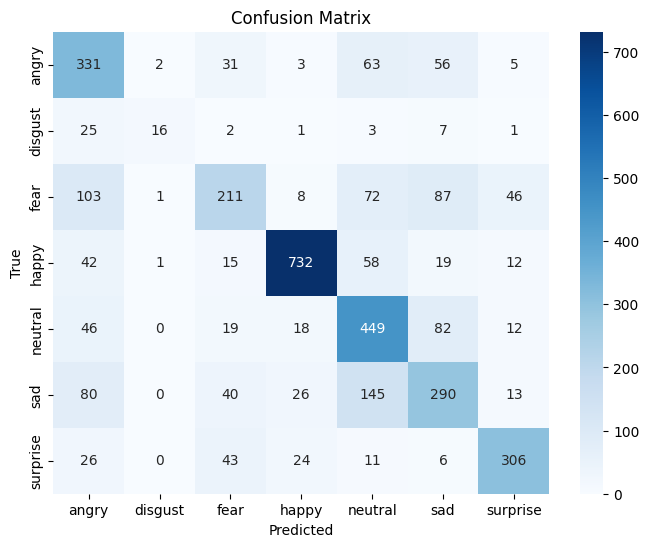

              precision    recall  f1-score   support

       angry       0.51      0.67      0.58       491
     disgust       0.80      0.29      0.43        55
        fear       0.58      0.40      0.47       528
       happy       0.90      0.83      0.87       879
     neutral       0.56      0.72      0.63       626
         sad       0.53      0.49      0.51       594
    surprise       0.77      0.74      0.75       416

    accuracy                           0.65      3589
   macro avg       0.67      0.59      0.61      3589
weighted avg       0.66      0.65      0.65      3589


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_dir = 'data/train'
val_dir = 'data/test'
test_dir = 'data_test/test'

input_shape = (48, 48, 1)
num_classes = 7

datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

model.summary()

batch_size = 128
epochs = 50

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle= False
)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("CNN2.pdf")
plt.show()

model.save("CNN2.keras")

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



true_labels = test_generator.classes
predictions = model.predict(test_generator)

predicted_labels = np.argmax(predictions, axis=1)

confusion_mat = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="Blues", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix_CNN2.pdf")
plt.show()

class_names = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)